In [1]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages')
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import date

In [2]:
stocks = ['MSFT','AAPL','AMZN','GOOG','GOOGL','FB','JNJ','V','PG','JPM','UNH','MA','INTC','VZ','HD','T','PFE','MRK','PEP']


In [4]:
close=pd.DataFrame()
for stock in stocks:
    a1 = yf.Ticker(stock)
    a2= a1.history()
    close[stock]=a2['Close']
close.head()

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
Date,,,,,,,,,,,,,,,,,,,
2020-07-06,210.70,373.85,3057.04,1495.70,1499.65,240.28,142.98,197.76,120.87,95.00,302.81,305.16,59.54,54.63,249.55,29.97,34.18,79.58,133.30
2020-07-07,208.25,372.69,3000.12,1485.18,1489.92,240.86,142.85,194.20,121.45,92.32,296.65,299.51,58.31,54.43,247.35,29.80,33.70,78.72,133.57
2020-07-08,212.83,381.37,3081.11,1496.00,1503.60,243.58,143.27,195.07,122.12,93.30,298.36,300.15,58.61,54.76,249.17,29.94,33.42,77.92,134.22
2020-07-09,214.32,383.01,3182.63,1510.99,1518.66,244.50,142.49,192.21,121.71,91.28,291.16,294.59,58.42,53.94,247.96,29.54,33.14,76.69,132.71
2020-07-10,213.67,383.68,3200.00,1541.74,1539.01,245.07,142.37,192.55,123.11,96.27,291.23,295.68,59.53,54.49,250.11,30.13,33.50,76.73,134.46


In [5]:
returns = close.pct_change().dropna()
returns.head()

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
Date,,,,,,,,,,,,,,,,,,,
2020-07-07,-0.011628,-0.003103,-0.018619,-0.007033,-0.006488,0.002414,-0.000909,-0.018002,0.004799,-0.028211,-0.020343,-0.018515,-0.020658,-0.003661,-0.008816,-0.005672,-0.014043,-0.010807,0.002026
2020-07-08,0.021993,0.023290,0.026996,0.007285,0.009182,0.011293,0.002940,0.004480,0.005517,0.010615,0.005764,0.002137,0.005145,0.006063,0.007358,0.004698,-0.008309,-0.010163,0.004866
2020-07-09,0.007001,0.004300,0.032949,0.010020,0.010016,0.003777,-0.005444,-0.014661,-0.003357,-0.021651,-0.024132,-0.018524,-0.003242,-0.014974,-0.004856,-0.013360,-0.008378,-0.015785,-0.011250
2020-07-10,-0.003033,0.001749,0.005458,0.020351,0.013400,0.002331,-0.000842,0.001769,0.011503,0.054667,0.000240,0.003700,0.019000,0.010197,0.008671,0.019973,0.010863,0.000522,0.013187
2020-07-13,-0.030889,-0.004613,-0.030000,-0.019718,-0.017401,-0.024768,0.019948,-0.018333,0.001300,0.014335,0.029118,-0.018601,-0.015958,-0.000734,-0.001959,-0.012280,0.040896,0.008080,0.003347


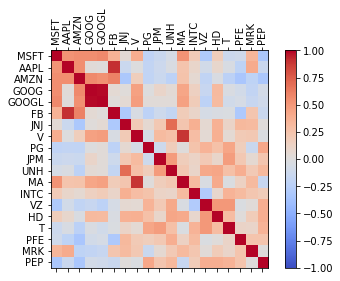

In [29]:
import matplotlib.pyplot as plt
data = returns
corr = returns.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [7]:
returns_mean = returns.mean()
print(returns_mean)
returns_corr=returns.corr()
print(returns_corr)

MSFT     0.000735
AAPL     0.007911
AMZN     0.002232
GOOG    -0.000451
GOOGL   -0.000367
FB       0.002364
JNJ      0.001316
V       -0.000443
PG       0.004203
JPM      0.001435
UNH      0.001327
MA       0.003387
INTC    -0.008214
VZ       0.002377
HD       0.003283
T        0.000074
PFE      0.005298
MRK      0.000902
PEP      0.000892
dtype: float64
           MSFT      AAPL      AMZN      GOOG     GOOGL        FB       JNJ  \
MSFT   1.000000  0.529145  0.542750  0.549293  0.577242  0.364898  0.034491   
AAPL   0.529145  1.000000  0.553822  0.033048  0.018271  0.912293 -0.123641   
AMZN   0.542750  0.553822  1.000000  0.569756  0.539185  0.582414 -0.271648   
GOOG   0.549293  0.033048  0.569756  1.000000  0.987027  0.051699  0.014995   
GOOGL  0.577242  0.018271  0.539185  0.987027  1.000000  0.020678  0.033596   
FB     0.364898  0.912293  0.582414  0.051699  0.020678  1.000000 -0.334085   
JNJ    0.034491 -0.123641 -0.271648  0.014995  0.033596 -0.334085  1.000000   
V      0.40

In [8]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [9]:
correlation(returns, 0.9)

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

In [15]:
len(returns.columns)

16

In [16]:
thresh = 0.9
while (len(returns.columns) > 5 ) == True :
    correlation(returns, thresh)
    thresh = thresh - 0.001

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.004690  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.00093

2020-08-06  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.01002

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

2020-08-06  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.01002

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

2020-08-06  0.000520 -0.006369 -0.002055  
                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.01002

                MSFT      AAPL      AMZN      GOOG       JNJ         V  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.018619 -0.007033 -0.000909 -0.018002   
2020-07-08  0.021993  0.023290  0.026996  0.007285  0.002940  0.004480   
2020-07-09  0.007001  0.004300  0.032949  0.010020 -0.005444 -0.014661   
2020-07-10 -0.003033  0.001749  0.005458  0.020351 -0.000842  0.001769   
2020-07-13 -0.030889 -0.004613 -0.030000 -0.019718  0.019948 -0.018333   
2020-07-14  0.006181  0.016548 -0.006443  0.006114  0.018663  0.022802   
2020-07-15 -0.001488  0.006877 -0.024361 -0.004564  0.002299  0.016655   
2020-07-16 -0.019804 -0.012305 -0.002981  0.002880  0.006677 -0.015518   
2020-07-17 -0.005100 -0.002020 -0.012644 -0.001614  0.000670  0.008217   
2020-07-20  0.042981  0.021074  0.079295  0.033103  0.001674  0.017325   
2020-07-21 -0.013469 -0.013802 -0.018315 -0.004662  0.000936 -0.010027   
2020-07-22  0.014371  0.002809 -0.0122

2020-08-06 -0.006369 -0.002055  
                MSFT      AAPL       JNJ         V        PG       JPM  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.000909 -0.018002  0.004799 -0.028211   
2020-07-08  0.021993  0.023290  0.002940  0.004480  0.005517  0.010615   
2020-07-09  0.007001  0.004300 -0.005444 -0.014661 -0.003357 -0.021651   
2020-07-10 -0.003033  0.001749 -0.000842  0.001769  0.011503  0.054667   
2020-07-13 -0.030889 -0.004613  0.019948 -0.018333  0.001300  0.014335   
2020-07-14  0.006181  0.016548  0.018663  0.022802  0.008437  0.005735   
2020-07-15 -0.001488  0.006877  0.002299  0.016655 -0.004746  0.015477   
2020-07-16 -0.019804 -0.012305  0.006677 -0.015518  0.002102  0.002808   
2020-07-17 -0.005100 -0.002020  0.000670  0.008217  0.006937 -0.018498   
2020-07-20  0.042981  0.021074  0.001674  0.017325 -0.003124 -0.008761   
2020-07-21 -0.013469 -0.013802  0.000936 -0.010027 -0.001286  0.021686   
2020-

2020-08-06 -0.002055  
                MSFT      AAPL       JNJ         V        PG       JPM  \
Date                                                                     
2020-07-07 -0.011628 -0.003103 -0.000909 -0.018002  0.004799 -0.028211   
2020-07-08  0.021993  0.023290  0.002940  0.004480  0.005517  0.010615   
2020-07-09  0.007001  0.004300 -0.005444 -0.014661 -0.003357 -0.021651   
2020-07-10 -0.003033  0.001749 -0.000842  0.001769  0.011503  0.054667   
2020-07-13 -0.030889 -0.004613  0.019948 -0.018333  0.001300  0.014335   
2020-07-14  0.006181  0.016548  0.018663  0.022802  0.008437  0.005735   
2020-07-15 -0.001488  0.006877  0.002299  0.016655 -0.004746  0.015477   
2020-07-16 -0.019804 -0.012305  0.006677 -0.015518  0.002102  0.002808   
2020-07-17 -0.005100 -0.002020  0.000670  0.008217  0.006937 -0.018498   
2020-07-20  0.042981  0.021074  0.001674  0.017325 -0.003124 -0.008761   
2020-07-21 -0.013469 -0.013802  0.000936 -0.010027 -0.001286  0.021686   
2020-07-22  0.0

2020-08-06  0.001912  0.005197  0.004690  0.000520 -0.006369 -0.002055  
                MSFT       JNJ         V        PG       JPM      INTC  \
Date                                                                     
2020-07-07 -0.011628 -0.000909 -0.018002  0.004799 -0.028211 -0.020658   
2020-07-08  0.021993  0.002940  0.004480  0.005517  0.010615  0.005145   
2020-07-09  0.007001 -0.005444 -0.014661 -0.003357 -0.021651 -0.003242   
2020-07-10 -0.003033 -0.000842  0.001769  0.011503  0.054667  0.019000   
2020-07-13 -0.030889  0.019948 -0.018333  0.001300  0.014335 -0.015958   
2020-07-14  0.006181  0.018663  0.022802  0.008437  0.005735  0.006828   
2020-07-15 -0.001488  0.002299  0.016655 -0.004746  0.015477  0.000848   
2020-07-16 -0.019804  0.006677 -0.015518  0.002102  0.002808  0.001863   
2020-07-17 -0.005100  0.000670  0.008217  0.006937 -0.018498  0.014542   
2020-07-20  0.042981  0.001674  0.017325 -0.003124 -0.008761  0.019167   
2020-07-21 -0.013469  0.000936 -0.01002

2020-08-06  0.001912  0.005197  0.004690  0.000520 -0.006369 -0.002055  
                MSFT       JNJ         V        PG       JPM      INTC  \
Date                                                                     
2020-07-07 -0.011628 -0.000909 -0.018002  0.004799 -0.028211 -0.020658   
2020-07-08  0.021993  0.002940  0.004480  0.005517  0.010615  0.005145   
2020-07-09  0.007001 -0.005444 -0.014661 -0.003357 -0.021651 -0.003242   
2020-07-10 -0.003033 -0.000842  0.001769  0.011503  0.054667  0.019000   
2020-07-13 -0.030889  0.019948 -0.018333  0.001300  0.014335 -0.015958   
2020-07-14  0.006181  0.018663  0.022802  0.008437  0.005735  0.006828   
2020-07-15 -0.001488  0.002299  0.016655 -0.004746  0.015477  0.000848   
2020-07-16 -0.019804  0.006677 -0.015518  0.002102  0.002808  0.001863   
2020-07-17 -0.005100  0.000670  0.008217  0.006937 -0.018498  0.014542   
2020-07-20  0.042981  0.001674  0.017325 -0.003124 -0.008761  0.019167   
2020-07-21 -0.013469  0.000936 -0.01002

2020-08-06  0.001912  0.000520 -0.006369 -0.002055  
                MSFT       JNJ         V        PG       JPM      INTC  \
Date                                                                     
2020-07-07 -0.011628 -0.000909 -0.018002  0.004799 -0.028211 -0.020658   
2020-07-08  0.021993  0.002940  0.004480  0.005517  0.010615  0.005145   
2020-07-09  0.007001 -0.005444 -0.014661 -0.003357 -0.021651 -0.003242   
2020-07-10 -0.003033 -0.000842  0.001769  0.011503  0.054667  0.019000   
2020-07-13 -0.030889  0.019948 -0.018333  0.001300  0.014335 -0.015958   
2020-07-14  0.006181  0.018663  0.022802  0.008437  0.005735  0.006828   
2020-07-15 -0.001488  0.002299  0.016655 -0.004746  0.015477  0.000848   
2020-07-16 -0.019804  0.006677 -0.015518  0.002102  0.002808  0.001863   
2020-07-17 -0.005100  0.000670  0.008217  0.006937 -0.018498  0.014542   
2020-07-20  0.042981  0.001674  0.017325 -0.003124 -0.008761  0.019167   
2020-07-21 -0.013469  0.000936 -0.010027 -0.001286  0.02168

2020-08-06  0.001912  0.000520 -0.006369 -0.002055  
                MSFT       JNJ         V        PG       JPM      INTC  \
Date                                                                     
2020-07-07 -0.011628 -0.000909 -0.018002  0.004799 -0.028211 -0.020658   
2020-07-08  0.021993  0.002940  0.004480  0.005517  0.010615  0.005145   
2020-07-09  0.007001 -0.005444 -0.014661 -0.003357 -0.021651 -0.003242   
2020-07-10 -0.003033 -0.000842  0.001769  0.011503  0.054667  0.019000   
2020-07-13 -0.030889  0.019948 -0.018333  0.001300  0.014335 -0.015958   
2020-07-14  0.006181  0.018663  0.022802  0.008437  0.005735  0.006828   
2020-07-15 -0.001488  0.002299  0.016655 -0.004746  0.015477  0.000848   
2020-07-16 -0.019804  0.006677 -0.015518  0.002102  0.002808  0.001863   
2020-07-17 -0.005100  0.000670  0.008217  0.006937 -0.018498  0.014542   
2020-07-20  0.042981  0.001674  0.017325 -0.003124 -0.008761  0.019167   
2020-07-21 -0.013469  0.000936 -0.010027 -0.001286  0.02168

2020-08-06  0.001912  0.000520 -0.006369  
                MSFT       JNJ         V        PG       JPM      INTC  \
Date                                                                     
2020-07-07 -0.011628 -0.000909 -0.018002  0.004799 -0.028211 -0.020658   
2020-07-08  0.021993  0.002940  0.004480  0.005517  0.010615  0.005145   
2020-07-09  0.007001 -0.005444 -0.014661 -0.003357 -0.021651 -0.003242   
2020-07-10 -0.003033 -0.000842  0.001769  0.011503  0.054667  0.019000   
2020-07-13 -0.030889  0.019948 -0.018333  0.001300  0.014335 -0.015958   
2020-07-14  0.006181  0.018663  0.022802  0.008437  0.005735  0.006828   
2020-07-15 -0.001488  0.002299  0.016655 -0.004746  0.015477  0.000848   
2020-07-16 -0.019804  0.006677 -0.015518  0.002102  0.002808  0.001863   
2020-07-17 -0.005100  0.000670  0.008217  0.006937 -0.018498  0.014542   
2020-07-20  0.042981  0.001674  0.017325 -0.003124 -0.008761  0.019167   
2020-07-21 -0.013469  0.000936 -0.010027 -0.001286  0.021686 -0.00735

2020-08-06  0.001912  0.000520 -0.006369  
                MSFT       JNJ         V        PG       JPM      INTC  \
Date                                                                     
2020-07-07 -0.011628 -0.000909 -0.018002  0.004799 -0.028211 -0.020658   
2020-07-08  0.021993  0.002940  0.004480  0.005517  0.010615  0.005145   
2020-07-09  0.007001 -0.005444 -0.014661 -0.003357 -0.021651 -0.003242   
2020-07-10 -0.003033 -0.000842  0.001769  0.011503  0.054667  0.019000   
2020-07-13 -0.030889  0.019948 -0.018333  0.001300  0.014335 -0.015958   
2020-07-14  0.006181  0.018663  0.022802  0.008437  0.005735  0.006828   
2020-07-15 -0.001488  0.002299  0.016655 -0.004746  0.015477  0.000848   
2020-07-16 -0.019804  0.006677 -0.015518  0.002102  0.002808  0.001863   
2020-07-17 -0.005100  0.000670  0.008217  0.006937 -0.018498  0.014542   
2020-07-20  0.042981  0.001674  0.017325 -0.003124 -0.008761  0.019167   
2020-07-21 -0.013469  0.000936 -0.010027 -0.001286  0.021686 -0.00735

2020-08-06  0.001912  0.000520 -0.006369  
                MSFT       JNJ         V        PG       JPM      INTC  \
Date                                                                     
2020-07-07 -0.011628 -0.000909 -0.018002  0.004799 -0.028211 -0.020658   
2020-07-08  0.021993  0.002940  0.004480  0.005517  0.010615  0.005145   
2020-07-09  0.007001 -0.005444 -0.014661 -0.003357 -0.021651 -0.003242   
2020-07-10 -0.003033 -0.000842  0.001769  0.011503  0.054667  0.019000   
2020-07-13 -0.030889  0.019948 -0.018333  0.001300  0.014335 -0.015958   
2020-07-14  0.006181  0.018663  0.022802  0.008437  0.005735  0.006828   
2020-07-15 -0.001488  0.002299  0.016655 -0.004746  0.015477  0.000848   
2020-07-16 -0.019804  0.006677 -0.015518  0.002102  0.002808  0.001863   
2020-07-17 -0.005100  0.000670  0.008217  0.006937 -0.018498  0.014542   
2020-07-20  0.042981  0.001674  0.017325 -0.003124 -0.008761  0.019167   
2020-07-21 -0.013469  0.000936 -0.010027 -0.001286  0.021686 -0.00735

2020-08-06  0.000520 -0.006369  
                MSFT       JNJ        PG       JPM      INTC        VZ  \
Date                                                                     
2020-07-07 -0.011628 -0.000909  0.004799 -0.028211 -0.020658 -0.003661   
2020-07-08  0.021993  0.002940  0.005517  0.010615  0.005145  0.006063   
2020-07-09  0.007001 -0.005444 -0.003357 -0.021651 -0.003242 -0.014974   
2020-07-10 -0.003033 -0.000842  0.011503  0.054667  0.019000  0.010197   
2020-07-13 -0.030889  0.019948  0.001300  0.014335 -0.015958 -0.000734   
2020-07-14  0.006181  0.018663  0.008437  0.005735  0.006828  0.018182   
2020-07-15 -0.001488  0.002299 -0.004746  0.015477  0.000848 -0.006854   
2020-07-16 -0.019804  0.006677  0.002102  0.002808  0.001863  0.013077   
2020-07-17 -0.005100  0.000670  0.006937 -0.018498  0.014542  0.009322   
2020-07-20  0.042981  0.001674 -0.003124 -0.008761  0.019167 -0.007638   
2020-07-21 -0.013469  0.000936 -0.001286  0.021686 -0.007359 -0.000537   
2020-

                MSFT       JNJ        PG       JPM       PFE       MRK
Date                                                                  
2020-07-07 -0.011628 -0.000909  0.004799 -0.028211 -0.014043 -0.010807
2020-07-08  0.021993  0.002940  0.005517  0.010615 -0.008309 -0.010163
2020-07-09  0.007001 -0.005444 -0.003357 -0.021651 -0.008378 -0.015785
2020-07-10 -0.003033 -0.000842  0.011503  0.054667  0.010863  0.000522
2020-07-13 -0.030889  0.019948  0.001300  0.014335  0.040896  0.008080
2020-07-14  0.006181  0.018663  0.008437  0.005735  0.000574  0.011635
2020-07-15 -0.001488  0.002299 -0.004746  0.015477  0.013758  0.015208
2020-07-16 -0.019804  0.006677  0.002102  0.002808 -0.003110 -0.000504
2020-07-17 -0.005100  0.000670  0.006937 -0.018498  0.018151  0.005919
2020-07-20  0.042981  0.001674 -0.003124 -0.008761  0.006964 -0.005759
2020-07-21 -0.013469  0.000936 -0.001286  0.021686  0.004979 -0.006548
2020-07-22  0.014371  0.001803  0.008528 -0.007243  0.051197 -0.001394
2020-0

In [22]:
print(returns.columns)

Index(['MSFT', 'JNJ', 'PG', 'JPM', 'PFE'], dtype='object')


In [18]:
returns.corr()

,MSFT,JNJ,PG,JPM,PFE
MSFT,1.000000,0.034491,-0.193050,-0.141999,-0.100347
JNJ,0.034491,1.000000,0.083934,0.197723,0.327090
PG,-0.193050,0.083934,1.000000,-0.130084,0.170504
JPM,-0.141999,0.197723,-0.130084,1.000000,0.235002
PFE,-0.100347,0.327090,0.170504,0.235002,1.000000


In [19]:
thresh

0.3319999999999995

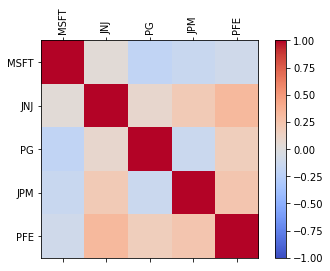

In [20]:
import matplotlib.pyplot as plt
data = returns
corr = returns.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()